In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
cd /content/drive/MyDrive/Task-3

/content/drive/MyDrive/Task-3


In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd



Please implement the below function `min_dist`. This function should take a sparse list of 2D coordinates, and map them to a 2D tensor of a specified resolution. The values of each pixel in the tensor should correspond to the [euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) between that pixel and the closest pixel which contains a data point.
*italicised text*
You can use either numpy or pytorch tensor operations to implement the function. Use only tensor operations, no for-loops are necessary.

Here are the example outputs for the two test cases highlighted below:

Case 1: data at `[0.4, 0.3], [0.6, 0.7]`, resolution 20 pixels.

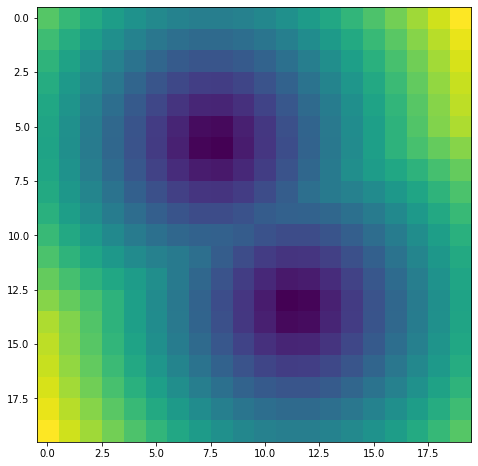


Case 2: data at `[0.4, 0.3], [0.6, 0.7], [0.3, 0.8], [0.5, 0.2]`, resolution 256 pixels.

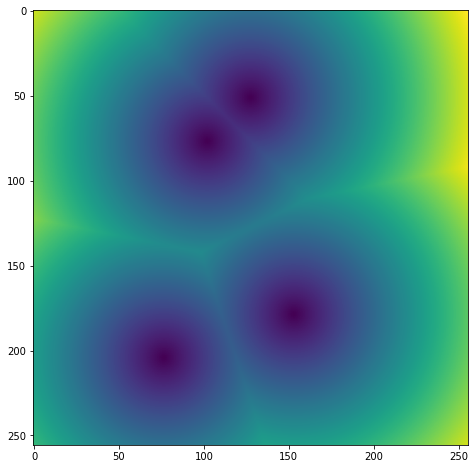


In [43]:
def min_dist(points, res):

    batch_size, num_points, _ = points.shape

    # Create a grid of points in the range [0, 1]
    grid = np.linspace(0, 1, res)
    xv, yv = np.meshgrid(grid, grid)  # [res, res]
    grid_points = np.stack([xv, yv], axis=-1)

    # Reshape grid points for broadcasting
    grid_points = grid_points.reshape(1, res, res, 2)  # [1, res, res, 2]
    points = points[:, :, :2]  # Exclude the third dimension (values)
    points = points.reshape(batch_size, 1, 1, num_points, 2)

    # Repeat grid_points along the batch dimension:
    grid_points = np.repeat(grid_points, batch_size, axis=0)

    distances = np.sqrt(((grid_points[..., None, :] - points) ** 2).sum(axis=-1))

    min_distances = distances.min(axis=-1)


    return min_distances

In [44]:
def create_points(batch_size, num_points):
    coords = np.random.rand(batch_size, num_points, 2)  # Random normalized coordinates [0, 1]
    values = np.random.randint(0, 10, batch_size * num_points).reshape(batch_size, num_points)
    values = np.expand_dims(values, 2)  # Shape: [B, P, 1]
    points = np.concatenate((coords, values), axis=2)  # Shape: [B, P, 3]
    return points

In [45]:
# Testing the function
batch_size = 3
num_points = 4

In [46]:
# Create Points
points = create_points(batch_size, num_points)
print(f"Points shape: {points.shape}")

Points shape: (3, 4, 3)


In [47]:
res = 25  # Resolution = 25
distances = min_dist(points, res)
print(f"Distances shape: {distances.shape}")

Distances shape: (3, 25, 25)


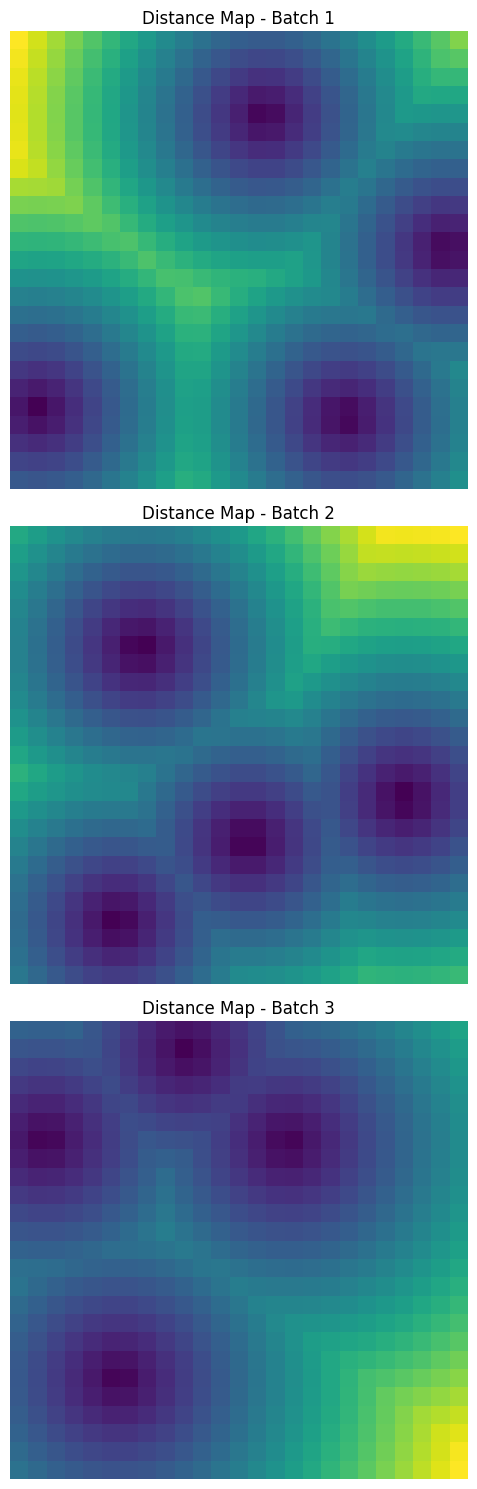

In [51]:
# Visualize the results
fig, axs = plt.subplots(batch_size, 1, figsize=(15, 15))
for i in range(batch_size):
    axs[i].imshow(distances[i], cmap='viridis')
    axs[i].set_title(f'Distance Map - Batch {i+1}')
    axs[i].axis('off')

plt.tight_layout()
plt.show()